# Processing Texas Database

Following the process described in [Prediction of Bridge Component Ratings Using Ordinal Logistic Regression Model](http://54.243.252.9/ce-5319-webroot/3-Readings/bridgeDatabase9797584.pdf) but for Texas data.

In [1]:
import warnings
warnings.filterwarnings('ignore')
# Playing with Texas Data
local_file_name='2021TexasNBIData.csv'
import pandas as pd
# Read the NBI Database
texasdb = pd.read_csv(local_file_name)

In [2]:
# Verify the Structure
texasdb.describe()

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,CRITICAL_FACILITY_006B,MIN_VERT_CLR_010,KILOPOINT_011,...,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUBMITTED_BY,DECK_AREA
count,64864.0,64861.000000,64863.000000,64802.000000,55179.000000,64864.000000,64864.000000,0.0,64864.000000,64627.000000,...,55179.000000,55134.000000,64570.000000,64794.000000,1332.000000,55179.000000,55179.000000,654.000000,64864.000000,55179.000000
mean,48.0,3.308383,1.536192,0.055677,12.724932,241.292335,18365.083159,NaN,84.662018,14.325147,...,0.001287,387.471143,9.593604,0.151573,1.081832,14738.009768,2032.348049,5.944190,48.065815,964.955676
std,0.0,1.524604,1.830507,0.409700,6.339940,148.401968,23984.559132,NaN,34.798024,81.534822,...,0.066350,786.827517,10.983355,0.358609,0.389648,33669.125288,10.215096,52.747722,1.226490,2706.771529
min,48.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1900.000000,0.000000,48.000000,22.570000
25%,48.0,2.000000,1.000000,0.000000,9.000000,113.000000,0.000000,NaN,99.990000,1.448000,...,0.000000,0.000000,0.000000,0.000000,1.000000,500.000000,2033.000000,0.000000,48.000000,135.150000
50%,48.0,3.000000,1.000000,0.000000,13.000000,201.000000,1000.000000,NaN,99.990000,6.437000,...,0.000000,0.000000,6.000000,0.000000,1.000000,3510.000000,2033.000000,0.000000,48.000000,313.600000
75%,48.0,4.000000,1.000000,0.000000,18.000000,373.000000,35000.000000,NaN,99.990000,19.195500,...,0.000000,0.000000,14.000000,0.000000,1.000000,14000.000000,2034.000000,0.000000,48.000000,870.195000
max,48.0,8.000000,8.000000,4.000000,48.000000,507.000000,99315.000000,NaN,99.990000,9999.999000,...,5.000000,2020.000000,99.000000,1.000000,5.000000,999999.000000,2086.000000,999.900000,75.000000,125732.720000


Extract just culverts send to different object name (its probably just a [HASH](https://www.tutorialspoint.com/data_structures_algorithms/hash_data_structure.htm)

We name our structure `txculv` (or whatever you want)


In [3]:
txculv = texasdb.loc[texasdb['STRUCTURE_TYPE_043B'] == 19]

In [4]:
txculv.describe()

,STATE_CODE_001,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,CRITICAL_FACILITY_006B,MIN_VERT_CLR_010,KILOPOINT_011,...,FEDERAL_LANDS_105,YEAR_RECONSTRUCTED_106,PERCENT_ADT_TRUCK_109,NATIONAL_NETWORK_110,PIER_PROTECTION_111,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,SUBMITTED_BY,DECK_AREA
count,20551.0,20551.00000,20551.000000,20551.000000,20545.000000,20551.000000,20551.000000,0.0,20551.000000,20551.000000,...,20545.000000,20520.000000,20498.000000,20551.000000,190.000000,20545.000000,20545.000000,111.000000,20551.000000,20545.000000
mean,48.0,3.25916,1.343390,0.019123,12.900949,248.910759,15100.965111,NaN,99.702754,13.756241,...,0.001898,583.425146,11.671675,0.077855,1.021053,11016.450961,2032.816938,6.052252,48.116247,219.712841
std,0.0,1.29903,1.492621,0.247959,6.490255,155.890098,23840.797409,NaN,5.223589,72.832328,...,0.080438,904.383997,12.044279,0.267950,0.204652,28829.037024,7.714370,41.045256,1.674647,284.001639
min,48.0,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,48.000000,24.790000
25%,48.0,3.00000,1.000000,0.000000,8.000000,113.000000,0.000000,NaN,99.990000,1.529000,...,0.000000,0.000000,1.000000,0.000000,1.000000,530.000000,2033.000000,0.000000,48.000000,95.950000
50%,48.0,3.00000,1.000000,0.000000,14.000000,231.000000,0.000000,NaN,99.990000,6.851000,...,0.000000,0.000000,9.000000,0.000000,1.000000,2450.000000,2033.000000,0.000000,48.000000,149.410000
75%,48.0,4.00000,1.000000,0.000000,18.000000,401.000000,27000.000000,NaN,99.990000,18.537000,...,0.000000,1961.000000,18.000000,0.000000,1.000000,9030.000000,2033.000000,0.000000,48.000000,251.490000
max,48.0,8.00000,8.000000,4.000000,25.000000,507.000000,83745.000000,NaN,99.990000,9999.999000,...,5.000000,2020.000000,90.000000,1.000000,3.000000,656470.000000,2052.000000,304.500000,74.000000,19993.960000


In [5]:
list(texasdb)

['STATE_CODE_001',
 'STRUCTURE_NUMBER_008',
 'RECORD_TYPE_005A',
 'ROUTE_PREFIX_005B',
 'SERVICE_LEVEL_005C',
 'ROUTE_NUMBER_005D',
 'DIRECTION_005E',
 'HIGHWAY_DISTRICT_002',
 'COUNTY_CODE_003',
 'PLACE_CODE_004',
 'FEATURES_DESC_006A',
 'CRITICAL_FACILITY_006B',
 'FACILITY_CARRIED_007',
 'LOCATION_009',
 'MIN_VERT_CLR_010',
 'KILOPOINT_011',
 'BASE_HWY_NETWORK_012',
 'LRS_INV_ROUTE_013A',
 'SUBROUTE_NO_013B',
 'LAT_016',
 'LONG_017',
 'DETOUR_KILOS_019',
 'TOLL_020',
 'MAINTENANCE_021',
 'OWNER_022',
 'FUNCTIONAL_CLASS_026',
 'YEAR_BUILT_027',
 'TRAFFIC_LANES_ON_028A',
 'TRAFFIC_LANES_UND_028B',
 'ADT_029',
 'YEAR_ADT_030',
 'DESIGN_LOAD_031',
 'APPR_WIDTH_MT_032',
 'MEDIAN_CODE_033',
 'DEGREES_SKEW_034',
 'STRUCTURE_FLARED_035',
 'RAILINGS_036A',
 'TRANSITIONS_036B',
 'APPR_RAIL_036C',
 'APPR_RAIL_END_036D',
 'HISTORY_037',
 'NAVIGATION_038',
 'NAV_VERT_CLR_MT_039',
 'NAV_HORR_CLR_MT_040',
 'OPEN_CLOSED_POSTED_041',
 'SERVICE_ON_042A',
 'SERVICE_UND_042B',
 'STRUCTURE_KIND_043A',
 '

In [6]:
txculv = txculv[['CULVERT_COND_062','YEAR_BUILT_027','ADT_029','DESIGN_LOAD_031','OPERATING_RATING_064','STRUCTURAL_EVAL_067',
                  'PERCENT_ADT_TRUCK_109','BRIDGE_CONDITION','YEAR_RECONSTRUCTED_106']].copy()

In [7]:
txculv.head()

,CULVERT_COND_062,YEAR_BUILT_027,ADT_029,DESIGN_LOAD_031,OPERATING_RATING_064,STRUCTURAL_EVAL_067,PERCENT_ADT_TRUCK_109,BRIDGE_CONDITION,YEAR_RECONSTRUCTED_106
0,7,2008,100.0,5,38.6,7,10.0,G,0.0
5,7,1990,15.0,0,36.3,7,NaN,G,0.0
18,7,1930,5581.0,0,32.7,6,16.0,G,1962.0
19,6,1934,5104.0,2,40.8,6,17.0,F,1959.0
21,6,1967,4348.0,5,44.4,6,19.0,F,0.0


In [8]:
txculv.describe()

,YEAR_BUILT_027,ADT_029,OPERATING_RATING_064,PERCENT_ADT_TRUCK_109,YEAR_RECONSTRUCTED_106
count,20551.000000,20551.000000,20476.000000,20498.000000,20520.000000
mean,1969.900151,8578.712715,39.604732,11.671675,583.425146
std,25.511268,21636.892122,9.133697,12.044279,904.383997
min,1914.000000,0.000000,0.000000,0.000000,0.000000
25%,1951.000000,400.000000,32.700000,1.000000,0.000000
50%,1967.000000,1950.000000,44.400000,9.000000,0.000000
75%,1990.000000,7101.500000,44.400000,18.000000,1961.000000
max,2020.000000,313693.000000,99.900000,90.000000,2020.000000


In [9]:
age = 2022 - txculv['YEAR_BUILT_027'] # age of culvert, surrogate for service life

In [10]:
drat = txculv['OPERATING_RATING_064'].fillna(1) # operating rating (in tons), nan is 1
drat = pd.to_numeric(drat) # coerce to numeric

In [11]:
steval = txculv['STRUCTURAL_EVAL_067'].fillna(1).replace('*','1') # structural eval, nan is 1 (not in original NBI coding tables)
steval = pd.to_numeric(steval) # coerce to numeric

In [12]:
adt =  txculv['ADT_029'].fillna(1) # 
adt = pd.to_numeric(adt) # coerce to numeric

In [24]:
pctrk =  txculv['PERCENT_ADT_TRUCK_109'].fillna(txculv['PERCENT_ADT_TRUCK_109'].mean()) # 
pctrk = pd.to_numeric(pctrk) # coerce to numeric


#df_filled2 = df.fillna(df.mean())


In [25]:
frame = { 'AGE': age, 'DRAT': drat, "ADT" :adt, "STEVAL":steval, "PCTRK":pctrk}
#frame = { 'AGE': age, 'DRAT': drat, "STEVAL":steval}
#Creating DataFrame by passing Dictionary
X = pd.DataFrame(frame)  # our design matrix

Now build our target

Prepare the target variable, from the culvert condition. The series has NaN and we convert these to a goofy string

In [26]:
pre_target = txculv['CULVERT_COND_062'].fillna('11').replace('N','10') # Nan to 11, "N" to 10 so all codes able to be numeric
print("Type ",type(pre_target[0]))

Type  <class 'str'>


then convert from string to numeric.

In [27]:
pre_target = pd.to_numeric(pre_target)
print("Type ",type(pre_target[0]))

Type  <class 'numpy.int64'>


Need a function to select the two conditions

In [35]:
def isok(value_int): # function to interpret condition rating and issue binary state 0 == fail 1 == OK
    cut = 3
    if value_int > cut:
        isok = 1
    elif value_int <= cut:
        isok = 0
    return(isok)

y = pre_target.apply(isok) # our target vector

Now check that our design matrix and target vector have correct structure

In [36]:
X.describe()

,AGE,DRAT,ADT,STEVAL,PCTRK
count,20551.000000,20551.000000,20551.000000,20551.000000,20551.000000
mean,52.099849,39.463846,8578.712715,6.164372,11.671675
std,25.511268,9.409530,21636.892122,0.838454,12.028738
min,2.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,32.700000,400.000000,6.000000,1.000000
50%,55.000000,44.400000,1950.000000,6.000000,9.000000
75%,71.000000,44.400000,7101.500000,7.000000,18.000000
max,108.000000,99.900000,313693.000000,9.000000,90.000000


In [37]:
y.describe()

count    20551.000000
mean         0.999465
std          0.023130
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: CULVERT_COND_062, dtype: float64

In [38]:
# Now we can do some machine learning
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [39]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [40]:
print(logreg.intercept_[0])
print(logreg.coef_)
#y.head()

0.08278239586830166
[[-1.03778439e-02 -1.30938676e-01  6.65067052e-05  2.17738437e+00
   6.97735441e-01]]


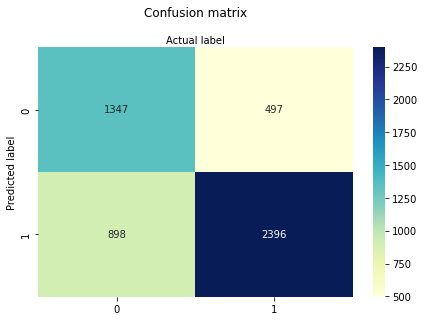

In [34]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_pred, y_test)
cnf_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label');

In [43]:
# import the class
from sklearn.linear_model import PoissonRegressor

# instantiate the model (using the default parameters)
#logreg = LogisticRegression()
posreg = PoissonRegressor()
# fit the model with data
posreg.fit(X_train,y_train)

#
y_pred=posreg.predict(X_test)

In [44]:
print(posreg.intercept_)
print(posreg.coef_)
#y.head()

-0.0005840932119201926
[0. 0. 0. 0. 0.]


In [45]:
y_pred

array([0.99941608, 0.99941608, 0.99941608, ..., 0.99941608, 0.99941608,
       0.99941608])

Structurally Deficient (SD): This term was previously defined in https://www.fhwa.dot.gov/bridge/0650dsup.cfm as having a condition rating of 4 or less for Item 58 (Deck), Item 59 (Superstructure), Item 60 (Substructure), or Item 62 (Culvert), OR having an appraisal rating of 2 or less for Item 67 (Structural Condition) or Item 71 (Waterway Adequacy) Beginning with the 2018 data archive, this term will be defined in accordance with the Pavement and Bridge Condition Performance Measures final rule, published in January of 2017, as a classification given to a bridge which has any component [Item 58, 59, 60, or 62] in Poor or worse condition [code of 4 or less].

This capacity rating, referred to as the operating rating, will result
in the absolute maximum permissible load level to which the structure
may be subjected for the vehicle type used in the rating. Code the
operating rating as a 3-digit number to represent the total mass in
metric tons of the entire vehicle measured to the nearest tenth of a
metric ton (with an assumed decimal point).

In [ ]:
#type(pre_target[0])

Prepare the target variable, the culvert condition as above (not processing just yet).
The series has NaN and we convert these to a goofy string
then convert from string to numeric.

Now make a proper target

In [ ]:
#target